# A neural network for a classification with multiple labels

## import library

In [622]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [623]:
directory_data  = './'
filename_data   = 'assignment_05_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [624]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('size of vector_x_train :', vec_x_train.shape)
print('size of vector_x_test :', vec_x_test.shape)
print('*************************************************')
print("vec_x_train",vec_x_train)
print("x_train", x_train)

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
size of vector_x_train : (20000, 784)
size of vector_x_test : (8000, 784)
*************************************************
vec_x_train [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
x_train [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ..

## index for each class

In [625]:
number_class        = y_train.shape[1]
length_data         = vec_x_train.shape[1]
number_data_train   = vec_x_train.shape[0]
number_data_test    = vec_x_test.shape[0]

index_train = {}
index_test  = {}

number_index_train  = np.zeros(number_class)
number_index_test   = np.zeros(number_class)

for i in range(number_class):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

In [626]:
print('*************************************************')
print('number of training data :', number_data_train)
print('length of testing data :', number_data_test)
print('*************************************************')
print('number of classes :', number_class)
print('length of data :', length_data)
print('*************************************************')
print('number of training images for each class :', number_index_train)
print('number of testing images for each class :', number_index_test)
print('*************************************************')

*************************************************
number of training data : 20000
length of testing data : 8000
*************************************************
number of classes : 10
length of data : 784
*************************************************
number of training images for each class : [2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.]
number of testing images for each class : [800. 800. 800. 800. 800. 800. 800. 800. 800. 800.]
*************************************************


## plot grey image

In [627]:
def plot_image(title, data):

    nRow = 2
    nCol = 5
    size = 2 
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

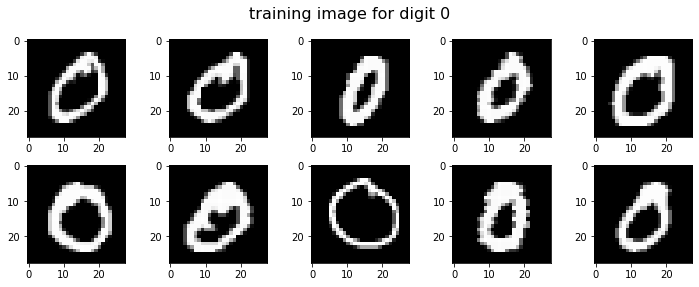

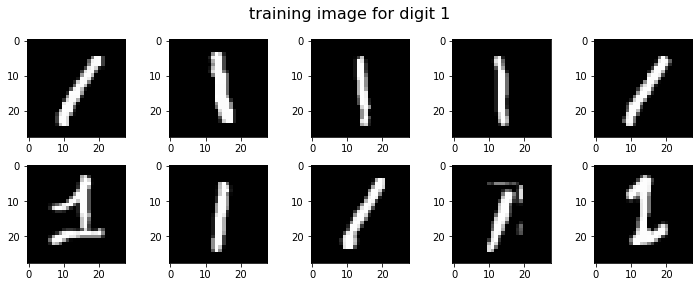

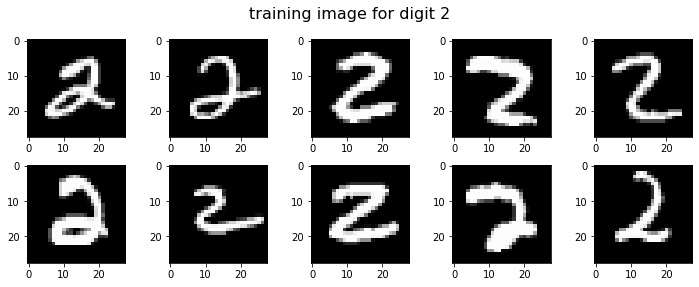

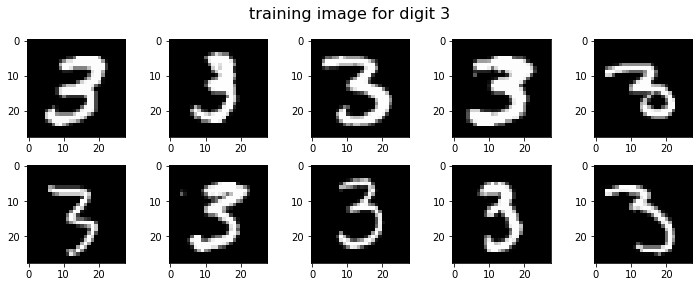

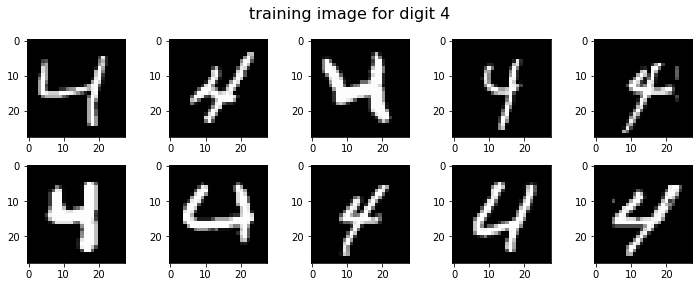

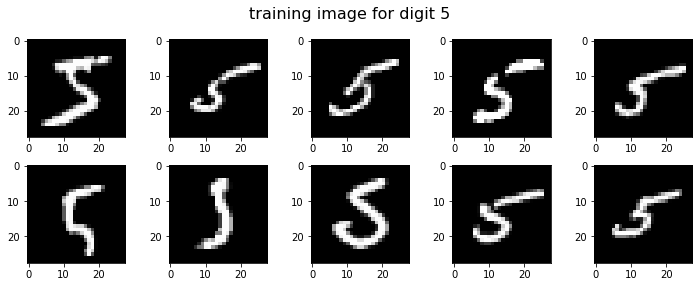

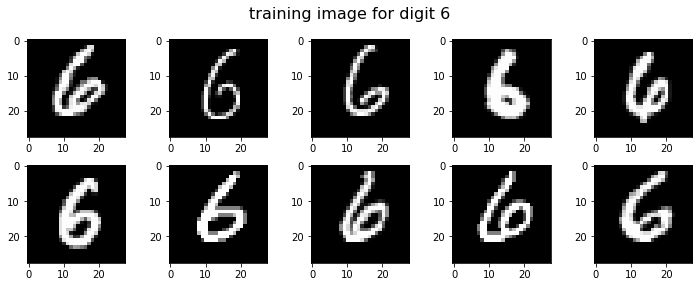

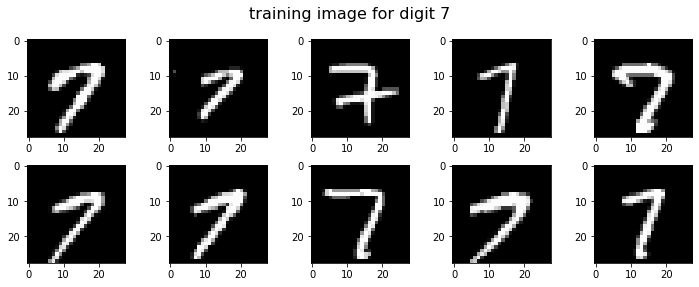

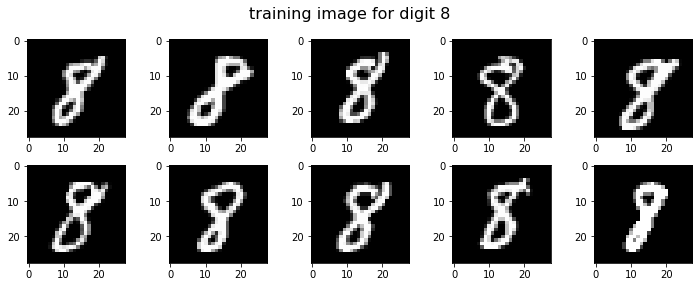

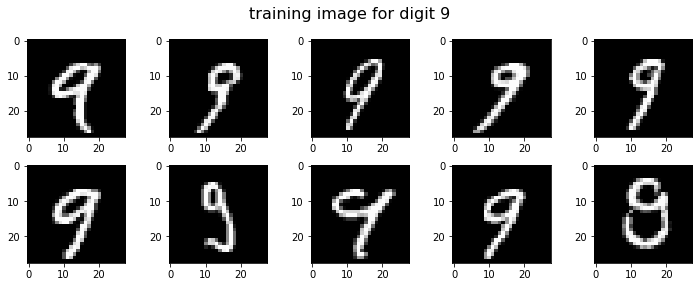

In [628]:
for c in range(number_class):

    index_class = c
    title       = 'training image for digit ' + str(index_class)
    plot_image(title, x_train[index_train[index_class][0]])

## initialize the neural network

- neural network consists of fullly connected linear layer followed by softmax activation function
- the size of the fully connected layer is input (length of data) and output (number of classes)

## initialize the weights for the fully connected layer

- create one matrix for the weights
- consider a bias in the construction of weights

In [629]:
# ================================================== 
# fill up the blank
#
size_input  = length_data+1
size_output = number_class
#
# ================================================== 

weight = np.ones((size_input, size_output))

In [630]:
print('size of the weight :', weight.shape)

size of the weight : (785, 10)


## initialize the data for considering a bisa

- add 1 at the end of each vectorized data

In [631]:
# ================================================== 
# fill up the blank
#
ones_train  = np.ones((number_data_train,1))
ones_test   = np.ones((number_data_test,1))

vec_x_train = np.concatenate((vec_x_train,ones_train),axis=1)
vec_x_test  = np.concatenate((vec_x_test,ones_test),axis=1)
#
# ================================================== 

In [632]:
print('size of training data :', vec_x_train.shape)
print('size of testing data :', vec_x_test.shape)

size of training data : (20000, 785)
size of testing data : (8000, 785)


## define neural network 

### define softmax function 

- input : number of data $\times$ number of classes
- output : number of data $\times$ number of classes

In [633]:
def activation_softmax(input):

# ================================================== 
# fill up the blank
#
    exp_input = np.exp(input) 
    exp_sum_input = np.sum(exp_input,axis=1)
    exp_sum_input = exp_sum_input.reshape(-1,1)
    output = exp_input / exp_sum_input

#
# ================================================== 

    return output 

### define the layer

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- output : number of data $\times$  number of classes

In [634]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#

    output = np.matmul(input, weight)

#
# ================================================== 

    return output

## define forward propagation

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- prediction : number of data $\times$  number of classes

In [635]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#

    output = layer_fully_connected(input, weight)
    prediction = activation_softmax(output)

#
# ================================================== 
    
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $- \sum_k y_k \log(h_k)$
  - $y_k$ : $k$-th element in grount truth
  - $h_k$ : $k$-th element in prediction
- weight decay : $\frac{\alpha}{2} \| w \|_2^2$
- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- loss : number of data $\times$ 1 

In [636]:
def compute_loss_data_fidelity(prediction, label):

# ================================================== 
# fill up the blank
#

    z = np.multiply(label,np.log(prediction))
    loss = -1 * np.sum(z,axis=1)
    #loss = loss/label.shape[0]
    #print(loss)
#
# ================================================== 

    return loss

In [637]:
def compute_loss_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#

    loss = weight**2
    loss = loss.sum()
    #loss = np.linalg.norm(weight, axis=1)
    loss = (alpha/2)*loss

#
# ================================================== 

    return loss

In [638]:
def compute_loss(prediction, label, weight, alpha):

# ================================================== 
# fill up the blank
#

    loss = np.sum(np.mean(compute_loss_data_fidelity(prediction, label)))+compute_loss_regularization(weight,alpha)

#
# ================================================== 

    return loss

## compute the accuracy

- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- accuracy : scalar
- note that iterations over the input data are not allowed inside the function

In [639]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#
    cnt_acc = np.array(np.where(np.argmax(prediction,axis=1)==np.argmax(label,axis=1)))
    accuracy = cnt_acc.shape[1]/label.shape[0]

#
# ================================================== 

    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- input : number of data $\times$ length of data
- label : number of data $\times$ number of classes
- prediction : number of data $\times$  number of classes
- gradient : length of data $\times$ number of classes

In [640]:
def compute_gradient_weight_data_fidelity(input, label, prediction):

# ================================================== 
# fill up the blank
#

    residual = prediction - label
    gradient = np.matmul(input.T,residual)
    gradient = gradient/input.shape[0]

#
# ================================================== 

    return gradient

In [641]:
def compute_gradient_weight_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#

    gradient = weight * alpha

#
# ================================================== 

    return gradient

In [642]:
def compute_gradient_weight(input, label, prediction, weight, alpha):

# ================================================== 
# fill up the blank
#

    gradient = compute_gradient_weight_data_fidelity(input, label, prediction) + compute_gradient_weight_regularization(weight, alpha)

#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [643]:
# ================================================== 
# fill up the blank
#
number_epoch        = 1000
size_minibatch      = 50
learning_rate       = 0.01
weight              = weight * 0.001
alpha               = 0.0001
#
# ================================================== 

## variables for storing intermediate results

In [644]:
accuracy_train  = np.zeros(number_epoch)
accuracy_test   = np.zeros(number_epoch)
loss_train_mean = np.zeros(number_epoch)
loss_train_std  = np.zeros(number_epoch)
loss_test_mean  = np.zeros(number_epoch)
loss_test_std   = np.zeros(number_epoch)
max=0

## run the gradient descent algorithm

In [645]:
for i in tqdm(range(number_epoch)):

    # ================================================== 
    # fill up the blank
    # shuffle data at each epoch
    #
    np.random.seed(0)    
    index_shuffle = np.random.permutation(number_data_train)
    x_train_shuffle = vec_x_train[index_shuffle]
    y_train_shuffle = y_train[index_shuffle]
    number_minibatch = vec_x_train.shape[0]//size_minibatch
    #print("number_minibatch", number_minibatch)
    cnt=0
    #
    # ================================================== 

    for j in range(number_minibatch):

        # ================================================== 
        # fill up the blank
        # update weights using a mini-batch
        #
        #compute_gradient_weight(input, label, prediction, weight, alpha)
        data = x_train_shuffle[cnt:cnt+size_minibatch]
        label_train = y_train_shuffle[cnt:cnt+size_minibatch]
        cnt += size_minibatch
        pred_train = compute_prediction(data, weight)
        grad_train = compute_gradient_weight(data, label_train, pred_train, weight, alpha)
        weight = weight - learning_rate*grad_train
        #
        # ================================================== 

    prediction_train    = compute_prediction(vec_x_train, weight)
    prediction_test     = compute_prediction(vec_x_test, weight)

    loss_train_mean[i]  = np.mean(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_mean[i]   = np.mean(compute_loss(prediction_test, y_test, weight, alpha))
    loss_train_std[i]   = np.std(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_std[i]    = np.std(compute_loss(prediction_test, y_test, weight, alpha))

    accuracy_train[i]   = compute_accuracy(prediction_train, y_train)
    accuracy_test[i]    = compute_accuracy(prediction_test, y_test)
    if accuracy_test[i] > max:
        print("acc = ", accuracy_test[i], " i= ", i)
        max = accuracy_test[i]

  0%|          | 1/1000 [00:00<05:34,  2.98it/s]

acc =  0.833875  i=  0


  0%|          | 2/1000 [00:00<05:25,  3.06it/s]

acc =  0.856625  i=  1


  0%|          | 3/1000 [00:00<05:07,  3.24it/s]

acc =  0.867125  i=  2


  0%|          | 4/1000 [00:01<04:47,  3.47it/s]

acc =  0.872375  i=  3


  0%|          | 5/1000 [00:01<04:42,  3.52it/s]

acc =  0.87675  i=  4


  1%|          | 6/1000 [00:01<04:39,  3.55it/s]

acc =  0.881375  i=  5


  1%|          | 7/1000 [00:02<04:38,  3.57it/s]

acc =  0.88475  i=  6


  1%|          | 8/1000 [00:02<04:34,  3.62it/s]

acc =  0.886125  i=  7


  1%|          | 9/1000 [00:02<04:34,  3.61it/s]

acc =  0.88825  i=  8


  1%|          | 10/1000 [00:02<04:30,  3.65it/s]

acc =  0.88975  i=  9


  1%|          | 11/1000 [00:03<04:33,  3.62it/s]

acc =  0.89025  i=  10


  1%|          | 12/1000 [00:03<04:29,  3.66it/s]

acc =  0.891125  i=  11


  1%|▏         | 13/1000 [00:03<04:30,  3.65it/s]

acc =  0.892125  i=  12


  1%|▏         | 14/1000 [00:03<04:36,  3.56it/s]

acc =  0.893875  i=  13


  2%|▏         | 15/1000 [00:04<04:33,  3.60it/s]

acc =  0.894875  i=  14


  2%|▏         | 16/1000 [00:04<04:30,  3.63it/s]

acc =  0.895875  i=  15


  2%|▏         | 17/1000 [00:04<04:33,  3.59it/s]

acc =  0.896625  i=  16


  2%|▏         | 18/1000 [00:05<04:34,  3.58it/s]

acc =  0.8975  i=  17


  2%|▏         | 19/1000 [00:05<04:40,  3.50it/s]

acc =  0.898125  i=  18


  2%|▏         | 20/1000 [00:05<04:49,  3.38it/s]

acc =  0.89875  i=  19


  2%|▏         | 21/1000 [00:06<05:03,  3.23it/s]

acc =  0.89925  i=  20


  2%|▏         | 22/1000 [00:06<05:08,  3.17it/s]

acc =  0.900125  i=  21


  2%|▏         | 23/1000 [00:06<05:19,  3.06it/s]

acc =  0.901375  i=  22


  2%|▏         | 24/1000 [00:07<05:26,  2.99it/s]

acc =  0.90225  i=  23


  3%|▎         | 26/1000 [00:07<05:32,  2.93it/s]

acc =  0.902625  i=  25


  3%|▎         | 27/1000 [00:08<05:34,  2.91it/s]

acc =  0.90325  i=  26


  3%|▎         | 28/1000 [00:08<05:36,  2.89it/s]

acc =  0.903875  i=  27


  3%|▎         | 29/1000 [00:08<05:34,  2.91it/s]

acc =  0.90425  i=  28


  3%|▎         | 30/1000 [00:09<05:38,  2.86it/s]

acc =  0.904375  i=  29


  3%|▎         | 31/1000 [00:09<05:37,  2.88it/s]

acc =  0.904625  i=  30


  3%|▎         | 32/1000 [00:09<05:42,  2.82it/s]

acc =  0.904875  i=  31


  3%|▎         | 33/1000 [00:10<05:42,  2.83it/s]

acc =  0.9055  i=  32


  3%|▎         | 34/1000 [00:10<05:43,  2.81it/s]

acc =  0.905625  i=  33


  4%|▎         | 35/1000 [00:10<05:43,  2.81it/s]

acc =  0.906125  i=  34


  4%|▎         | 37/1000 [00:11<05:33,  2.89it/s]

acc =  0.906375  i=  36


  4%|▍         | 38/1000 [00:12<05:43,  2.80it/s]

acc =  0.907  i=  37


  4%|▍         | 43/1000 [00:13<05:43,  2.79it/s]

acc =  0.90725  i=  42


  5%|▍         | 46/1000 [00:14<05:32,  2.87it/s]

acc =  0.907375  i=  45


  5%|▍         | 47/1000 [00:15<05:29,  2.89it/s]

acc =  0.907625  i=  46


  5%|▍         | 49/1000 [00:15<05:26,  2.91it/s]

acc =  0.908125  i=  48


  5%|▌         | 50/1000 [00:16<05:27,  2.90it/s]

acc =  0.908375  i=  49


  5%|▌         | 51/1000 [00:16<05:27,  2.90it/s]

acc =  0.9085  i=  50


  5%|▌         | 52/1000 [00:16<05:26,  2.90it/s]

acc =  0.90875  i=  51


  5%|▌         | 53/1000 [00:17<05:29,  2.87it/s]

acc =  0.908875  i=  52


  6%|▌         | 57/1000 [00:18<05:32,  2.83it/s]

acc =  0.909  i=  56


  6%|▌         | 58/1000 [00:19<05:28,  2.87it/s]

acc =  0.909125  i=  57


  6%|▌         | 60/1000 [00:19<05:30,  2.84it/s]

acc =  0.909375  i=  59


  7%|▋         | 66/1000 [00:21<05:34,  2.79it/s]

acc =  0.909625  i=  65


  7%|▋         | 69/1000 [00:22<05:32,  2.80it/s]

acc =  0.909875  i=  68


  7%|▋         | 70/1000 [00:23<05:34,  2.78it/s]

acc =  0.91  i=  69


  7%|▋         | 71/1000 [00:23<05:36,  2.76it/s]

acc =  0.91025  i=  70


  7%|▋         | 73/1000 [00:24<05:39,  2.73it/s]

acc =  0.910375  i=  72


  8%|▊         | 75/1000 [00:25<05:38,  2.73it/s]

acc =  0.91075  i=  74


  8%|▊         | 76/1000 [00:25<05:38,  2.73it/s]

acc =  0.910875  i=  75


  8%|▊         | 77/1000 [00:25<05:39,  2.72it/s]

acc =  0.911  i=  76


  8%|▊         | 81/1000 [00:27<05:49,  2.63it/s]

acc =  0.911125  i=  80


  8%|▊         | 85/1000 [00:28<05:47,  2.63it/s]

acc =  0.91125  i=  84


  9%|▊         | 87/1000 [00:29<05:55,  2.57it/s]

acc =  0.911375  i=  86


  9%|▉         | 89/1000 [00:30<05:47,  2.62it/s]

acc =  0.9115  i=  88


  9%|▉         | 92/1000 [00:31<05:52,  2.58it/s]

acc =  0.911625  i=  91


 10%|▉         | 96/1000 [00:33<05:47,  2.60it/s]

acc =  0.912  i=  95


 10%|█         | 104/1000 [00:36<05:30,  2.71it/s]

acc =  0.91225  i=  103


 11%|█         | 107/1000 [00:37<05:30,  2.70it/s]

acc =  0.912375  i=  106


 11%|█         | 108/1000 [00:37<05:30,  2.70it/s]

acc =  0.9125  i=  107


 11%|█         | 109/1000 [00:38<05:27,  2.72it/s]

acc =  0.912625  i=  108


 11%|█         | 112/1000 [00:39<05:31,  2.68it/s]

acc =  0.91275  i=  111


 11%|█▏        | 113/1000 [00:39<05:33,  2.66it/s]

acc =  0.912875  i=  112


 12%|█▏        | 119/1000 [00:41<05:26,  2.70it/s]

acc =  0.913  i=  118


 13%|█▎        | 131/1000 [00:46<05:09,  2.81it/s]

acc =  0.913125  i=  130


 15%|█▌        | 152/1000 [00:53<05:26,  2.60it/s]

acc =  0.91325  i=  151


 16%|█▌        | 157/1000 [00:55<05:16,  2.67it/s]

acc =  0.913375  i=  156


 16%|█▌        | 158/1000 [00:56<05:11,  2.70it/s]

acc =  0.9135  i=  157


 16%|█▌        | 159/1000 [00:56<05:11,  2.70it/s]

acc =  0.913625  i=  158


 16%|█▌        | 161/1000 [00:57<05:10,  2.71it/s]

acc =  0.91375  i=  160


 17%|█▋        | 167/1000 [00:59<04:57,  2.80it/s]

acc =  0.913875  i=  166


 17%|█▋        | 170/1000 [01:00<04:58,  2.78it/s]

acc =  0.914125  i=  169


 17%|█▋        | 172/1000 [01:01<04:55,  2.80it/s]

acc =  0.91425  i=  171


 18%|█▊        | 183/1000 [01:05<04:54,  2.78it/s]

acc =  0.914375  i=  182


 26%|██▌       | 259/1000 [01:32<04:25,  2.80it/s]

acc =  0.9145  i=  258


 26%|██▋       | 263/1000 [01:34<04:28,  2.74it/s]

acc =  0.91475  i=  262


 29%|██▉       | 291/1000 [01:44<04:40,  2.52it/s]

acc =  0.914875  i=  290


 29%|██▉       | 293/1000 [01:45<04:55,  2.39it/s]

acc =  0.915  i=  292


100%|██████████| 1000/1000 [06:10<00:00,  2.70it/s]


---

## functions for presenting the results

---

In [646]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [647]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [648]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [649]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [650]:
def function_result_05():

    print('final training accuracy = %9.8f' % (accuracy_train[-1]))

In [651]:
def function_result_06():

    print('final testing accuracy = %9.8f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



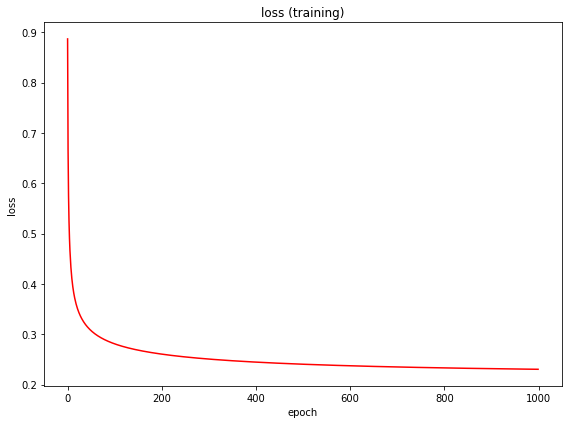


################################################################################
#
# RESULT # 02
#
################################################################################



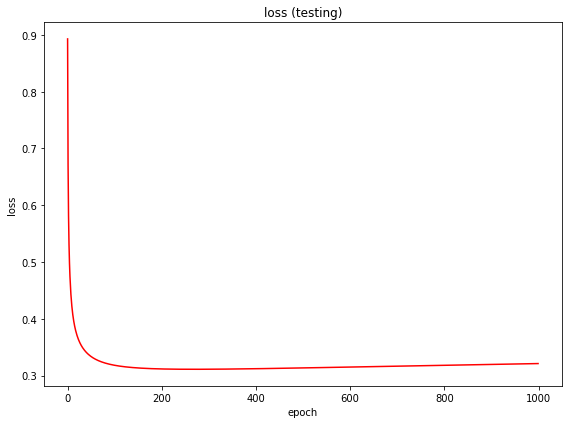


################################################################################
#
# RESULT # 03
#
################################################################################



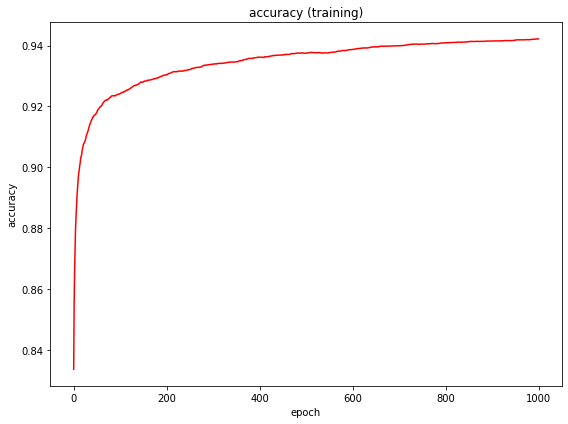


################################################################################
#
# RESULT # 04
#
################################################################################



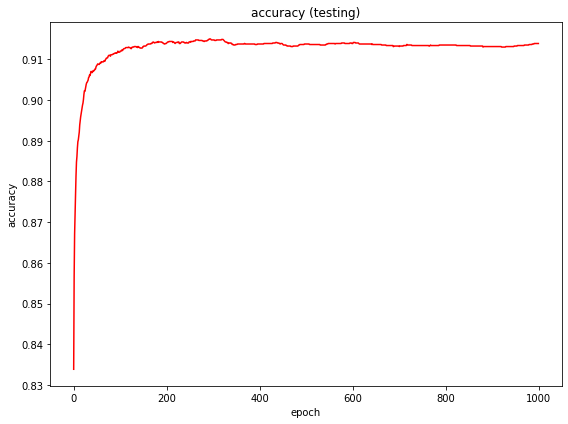


################################################################################
#
# RESULT # 05
#
################################################################################

final training accuracy = 0.94220000

################################################################################
#
# RESULT # 06
#
################################################################################

final testing accuracy = 0.91387500


In [652]:
number_result = 6 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)